<a href="https://colab.research.google.com/github/yashguptaji/movie_recommender/blob/main/recommender_system_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install kaggle

In [10]:

from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"yguptaiitg","key":"20d81439047188bfaf3a8b596057c4d8"}'}

In [11]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# change permission
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
!kaggle datasets download -d tmdb/tmdb-movie-metadata

 56% 5.00M/8.89M [00:00<00:00, 19.6MB/s]
100% 8.89M/8.89M [00:00<00:00, 29.3MB/s]


In [13]:
from zipfile import ZipFile
file_name = "tmdb-movie-metadata.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("Done!")

Done!


In [6]:
credits = pd.read_csv(".csv")

FileNotFoundError: ignored

In [15]:
import numpy as np
import pandas as pd

In [16]:
credits=pd.read_csv("tmdb_5000_credits.csv")
movies_df=pd.read_csv("tmdb_5000_movies.csv")

In [20]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [21]:
movies_df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [25]:
credits_renamed = credits.rename(index=str,columns={"movie_id":"id"}) #rename movie_id to id and then merge the datasetsm
movies = movies_df.merge(credits_renamed,on="id")
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [26]:
movies=movies.drop(columns=['homepage','title_x','title_y','status','production_countries'])

In [27]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  tagline               3959 non-null   object 
 14  vote_average          4803 non-null   float64
 15  vote_count           

** Using Weighted Average **

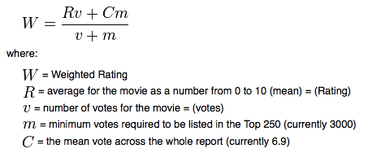

In [28]:

# Calculate all the components based on the above formula
v=movies['vote_count']
R=movies['vote_average']
C=movies['vote_average'].mean()
m=movies['vote_count'].quantile(0.70)

In [29]:
movies['weighted_average']=(R*v + C*m)/(v+m)
movies['weighted_average']

0       7.148013
1       6.807627
2       6.276075
3       7.509565
4       6.098319
          ...   
4798    6.239746
4799    6.090532
4800    6.101451
4801    6.087503
4802    6.097742
Name: weighted_average, Length: 4803, dtype: float64

In [39]:
movies_sorted=movies.sort_values('weighted_average',ascending=False)
movies_sorted[['original_title', 'vote_count', 'vote_average', 'weighted_average', 'popularity',"weighted_average"]].head(20)

,original_title,vote_count,vote_average,weighted_average,popularity,weighted_average
1881,The Shawshank Redemption,8205,8.5,8.340775,136.747729,8.340775
3337,The Godfather,5893,8.4,8.192887,143.659698,8.192887
662,Fight Club,9413,8.3,8.171648,146.757391,8.171648
3232,Pulp Fiction,8428,8.3,8.157615,121.463076,8.157615
65,The Dark Knight,12002,8.2,8.102674,187.322927,8.102674
809,Forrest Gump,7927,8.2,8.056059,138.133331,8.056059
1818,Schindler's List,4329,8.3,8.038748,104.469351,8.038748
3865,Whiplash,4254,8.3,8.034695,192.528841,8.034695
96,Inception,13752,8.1,8.018611,167.583710,8.018611
1990,The Empire Strikes Back,5879,8.2,8.010426,78.517830,8.010426


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

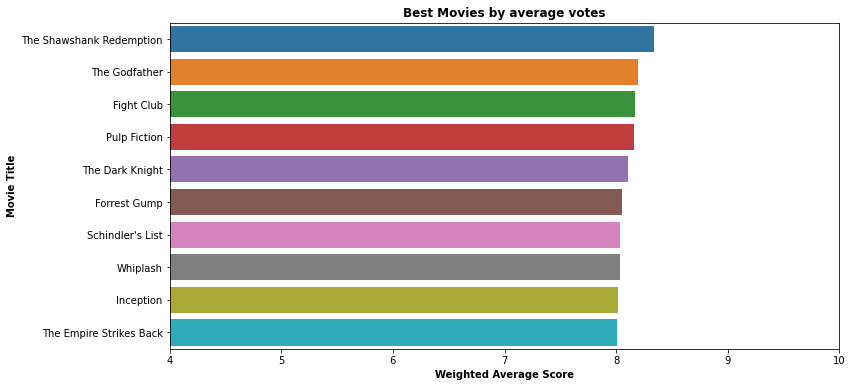

In [45]:
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=movies_sorted['weighted_average'].head(10), y=movies_sorted['original_title'].head(10), data=movies_sorted)
plt.xlim(4, 10)
plt.title('Best Movies by average votes', weight='bold')
plt.xlabel('Weighted Average Score', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_movies.png')

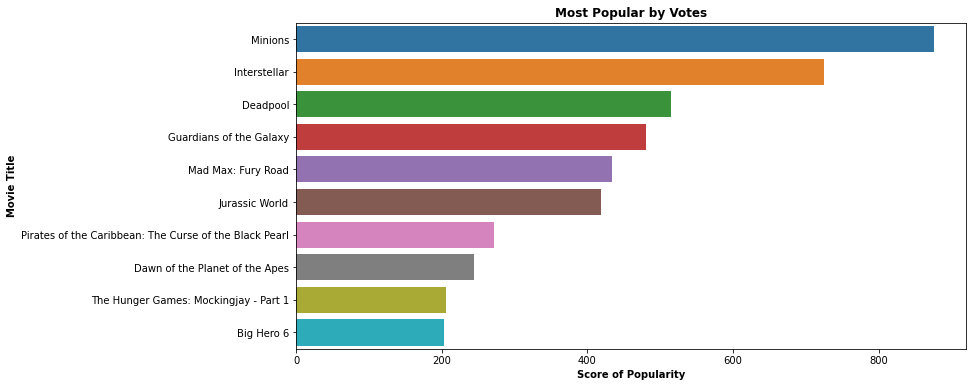

In [47]:
popularity=movies_sorted.sort_values('popularity',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=popularity['popularity'].head(10), y=popularity['original_title'].head(10), data=popularity)

plt.title('Most Popular by Votes', weight='bold')
plt.xlabel('Score of Popularity', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_popular_movies.png')

***Recommendation based on scaled weighted average and popularity score(Priority is given 50% to both)***

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaling=MinMaxScaler()
movie_scaled=scaling.fit_transform(movies[['weighted_average','popularity']])
movie_normalized=pd.DataFrame(movie_scaled,columns=['weighted_average','popularity'])
movie_normalized.head()

,weighted_average,popularity
0,0.674339,0.171815
1,0.581403,0.158846
2,0.436273,0.122635
3,0.773054,0.128272
4,0.387739,0.050169


In [49]:
movies[['normalized_weight_average','normalized_popularity']]= movie_normalized


In [50]:
movies['score'] = movies['normalized_weight_average'] * 0.5 + movies['normalized_popularity'] * 0.5
movies_score = movies.sort_values(['score'], ascending=False)
movies_score[['original_title', 'normalized_weight_average', 'normalized_popularity', 'score']].head(20)

,original_title,normalized_weight_average,normalized_popularity,score
95,Interstellar,0.906439,0.827162,0.866801
546,Minions,0.460630,1.000000,0.730315
94,Guardians of the Galaxy,0.851874,0.549462,0.700668
788,Deadpool,0.725217,0.587690,0.656453
127,Mad Max: Fury Road,0.670973,0.495989,0.583481
1881,The Shawshank Redemption,1.000000,0.156179,0.578090
65,The Dark Knight,0.934991,0.213941,0.574466
3865,Whiplash,0.916431,0.219887,0.568159
3337,The Godfather,0.959622,0.164074,0.561848
662,Fight Club,0.953823,0.167611,0.560717


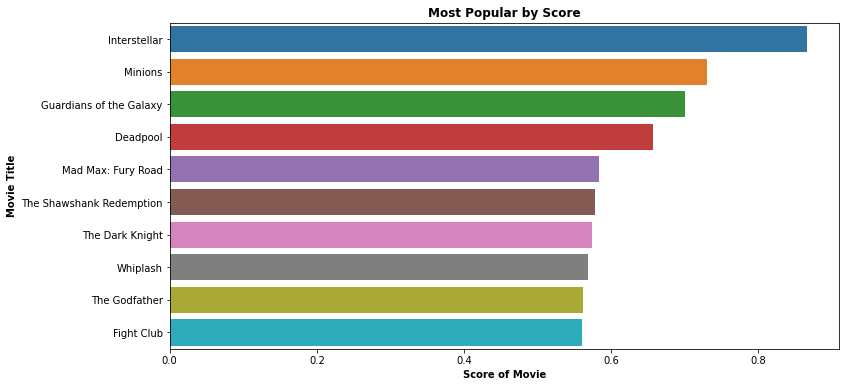

In [52]:
plt.figure(figsize=(12,6))
ax=sns.barplot(x=movies_score['score'].head(10), y=movies_score['original_title'].head(10), data=movies_score)

plt.title('Most Popular by Score', weight='bold')
plt.xlabel('Score of Movie', weight='bold')
plt.ylabel('Movie Title', weight='bold')
plt.savefig('best_scoring_movies.png')

**Content Based Recommendation System**

A recommendations based on the movie’s plot summaries given in the overview column. So if our user gives us a movie title, our goal is to recommend movies that share similar plot summaries.

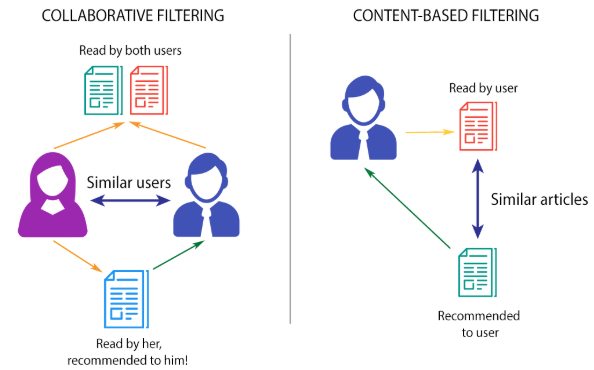

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using arguments for TF-IDF
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
movies['overview'] = movies['overview'].fillna('')

In [54]:
# Fitting the TF-IDF on the 'overview' text
tfv_matrix = tfv.fit_transform(movies['overview'])

In [55]:
tfv_matrix.shape

(4803, 10417)

In [56]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [57]:
# Reverse mapping of indices and movie titles
indices = pd.Series(movies.index, index=movies['original_title']).drop_duplicates()

In [58]:
indices

original_title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [59]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    movie_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    return movies['original_title'].iloc[movie_indices]

In [63]:
#Example
ex="Superman"
give_rec(ex)

870                          Superman II
10                      Superman Returns
2433    Superman IV: The Quest for Peace
3542                                R100
914                 Central Intelligence
1368                      Identity Thief
2218                      Death Sentence
916                         Daddy's Home
4659                          Horse Camp
3109                              Edmond
Name: original_title, dtype: object

Enter a Movie Name to find recommendations

Type in this format:
"Movie Name" and not "movie name"

In [67]:
ex=input("Enter movie:  ")
give_rec(ex)


Enter movie:  Iron Man


79                      Iron Man 2
31                      Iron Man 3
7          Avengers: Age of Ultron
538                        Hostage
1290      Baahubali: The Beginning
4233                     Unsullied
4325      Beyond the Black Rainbow
1868            Cradle 2 the Grave
4321    From a Whisper to a Scream
119                  Batman Begins
Name: original_title, dtype: object